## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;               The Sparks Foundation

### &emsp;&emsp;&emsp; &emsp;&emsp;&emsp;     Prediction using Decision Tree Algorithm (Level Intermediate) 


####  Task Objective : Create the Decision Tree classifier and visualize it graphically. Also check if we feed any new data to this classifier, would it be able to predict the right class accordingly

####  Author : Nimma Shravan Kumar Reddy

#### Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. A decision tree algorithm can be used to solve both regression and classification problems. A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Reading Data 

In [6]:
url = 'C:/Users/Admin/Downloads/iris.csv'
data = pd.read_csv(url)

###  Insights of Data 

In [7]:
data.head() # First five rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
data.tail() # last five rows.

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
# Information about Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### It seems like there are no missing values in the data. All of the columns are using 'float64' data type except the species which is an object type.

In [10]:
# Basic statistical details
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


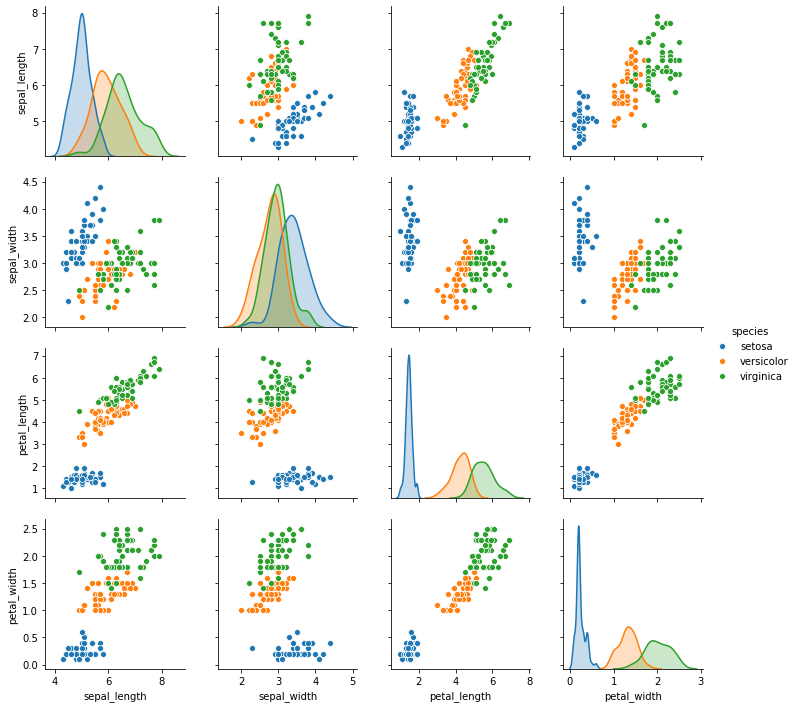

In [11]:
# Data Visualization
sns.pairplot(df, hue='species')

#### Observations 
<ul><li>Using petal length we can separate iris-setosa</li><li>Using sepal length,sepal width we can’t do anything because it’s all messed up (Overlapped) and we can’t separate the flowers</li><li> Petal width of iris setosa is not distributed properly</li></ul>

In [16]:
# Seperating target values form dataset
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values      # target

###  Splitting the Dataset

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = 1)

###  Classification Model 

In [40]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
#Prediction
y_pred = classifier.predict(x_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype=object)

In [42]:
# Classification Report and Accuracy
from sklearn.metrics import accuracy_score,classification_report 
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print(cr)
print("Accuracy score : ",score)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy score :  0.9736842105263158


###  k-fold Cross-Validation 

In [43]:
# Cross-validation is powerful preventive measure against overfitting.
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)
print("Decision Tree Classifier Accuracy : {:.2f}% and standard deviation of {:.2f}%"
      .format(accuracies.mean()*100,accuracies.std()*100))

Decision Tree Classifier Accuracy : 95.49% and standard deviation of 6.39%


#### We got an accuracy of 95.49% which is good and we can improve our accuracy by finding the best parameters for the decision tree classifier by using GridSearchCV method.

###  Visualizing Decision Tree Graphically 

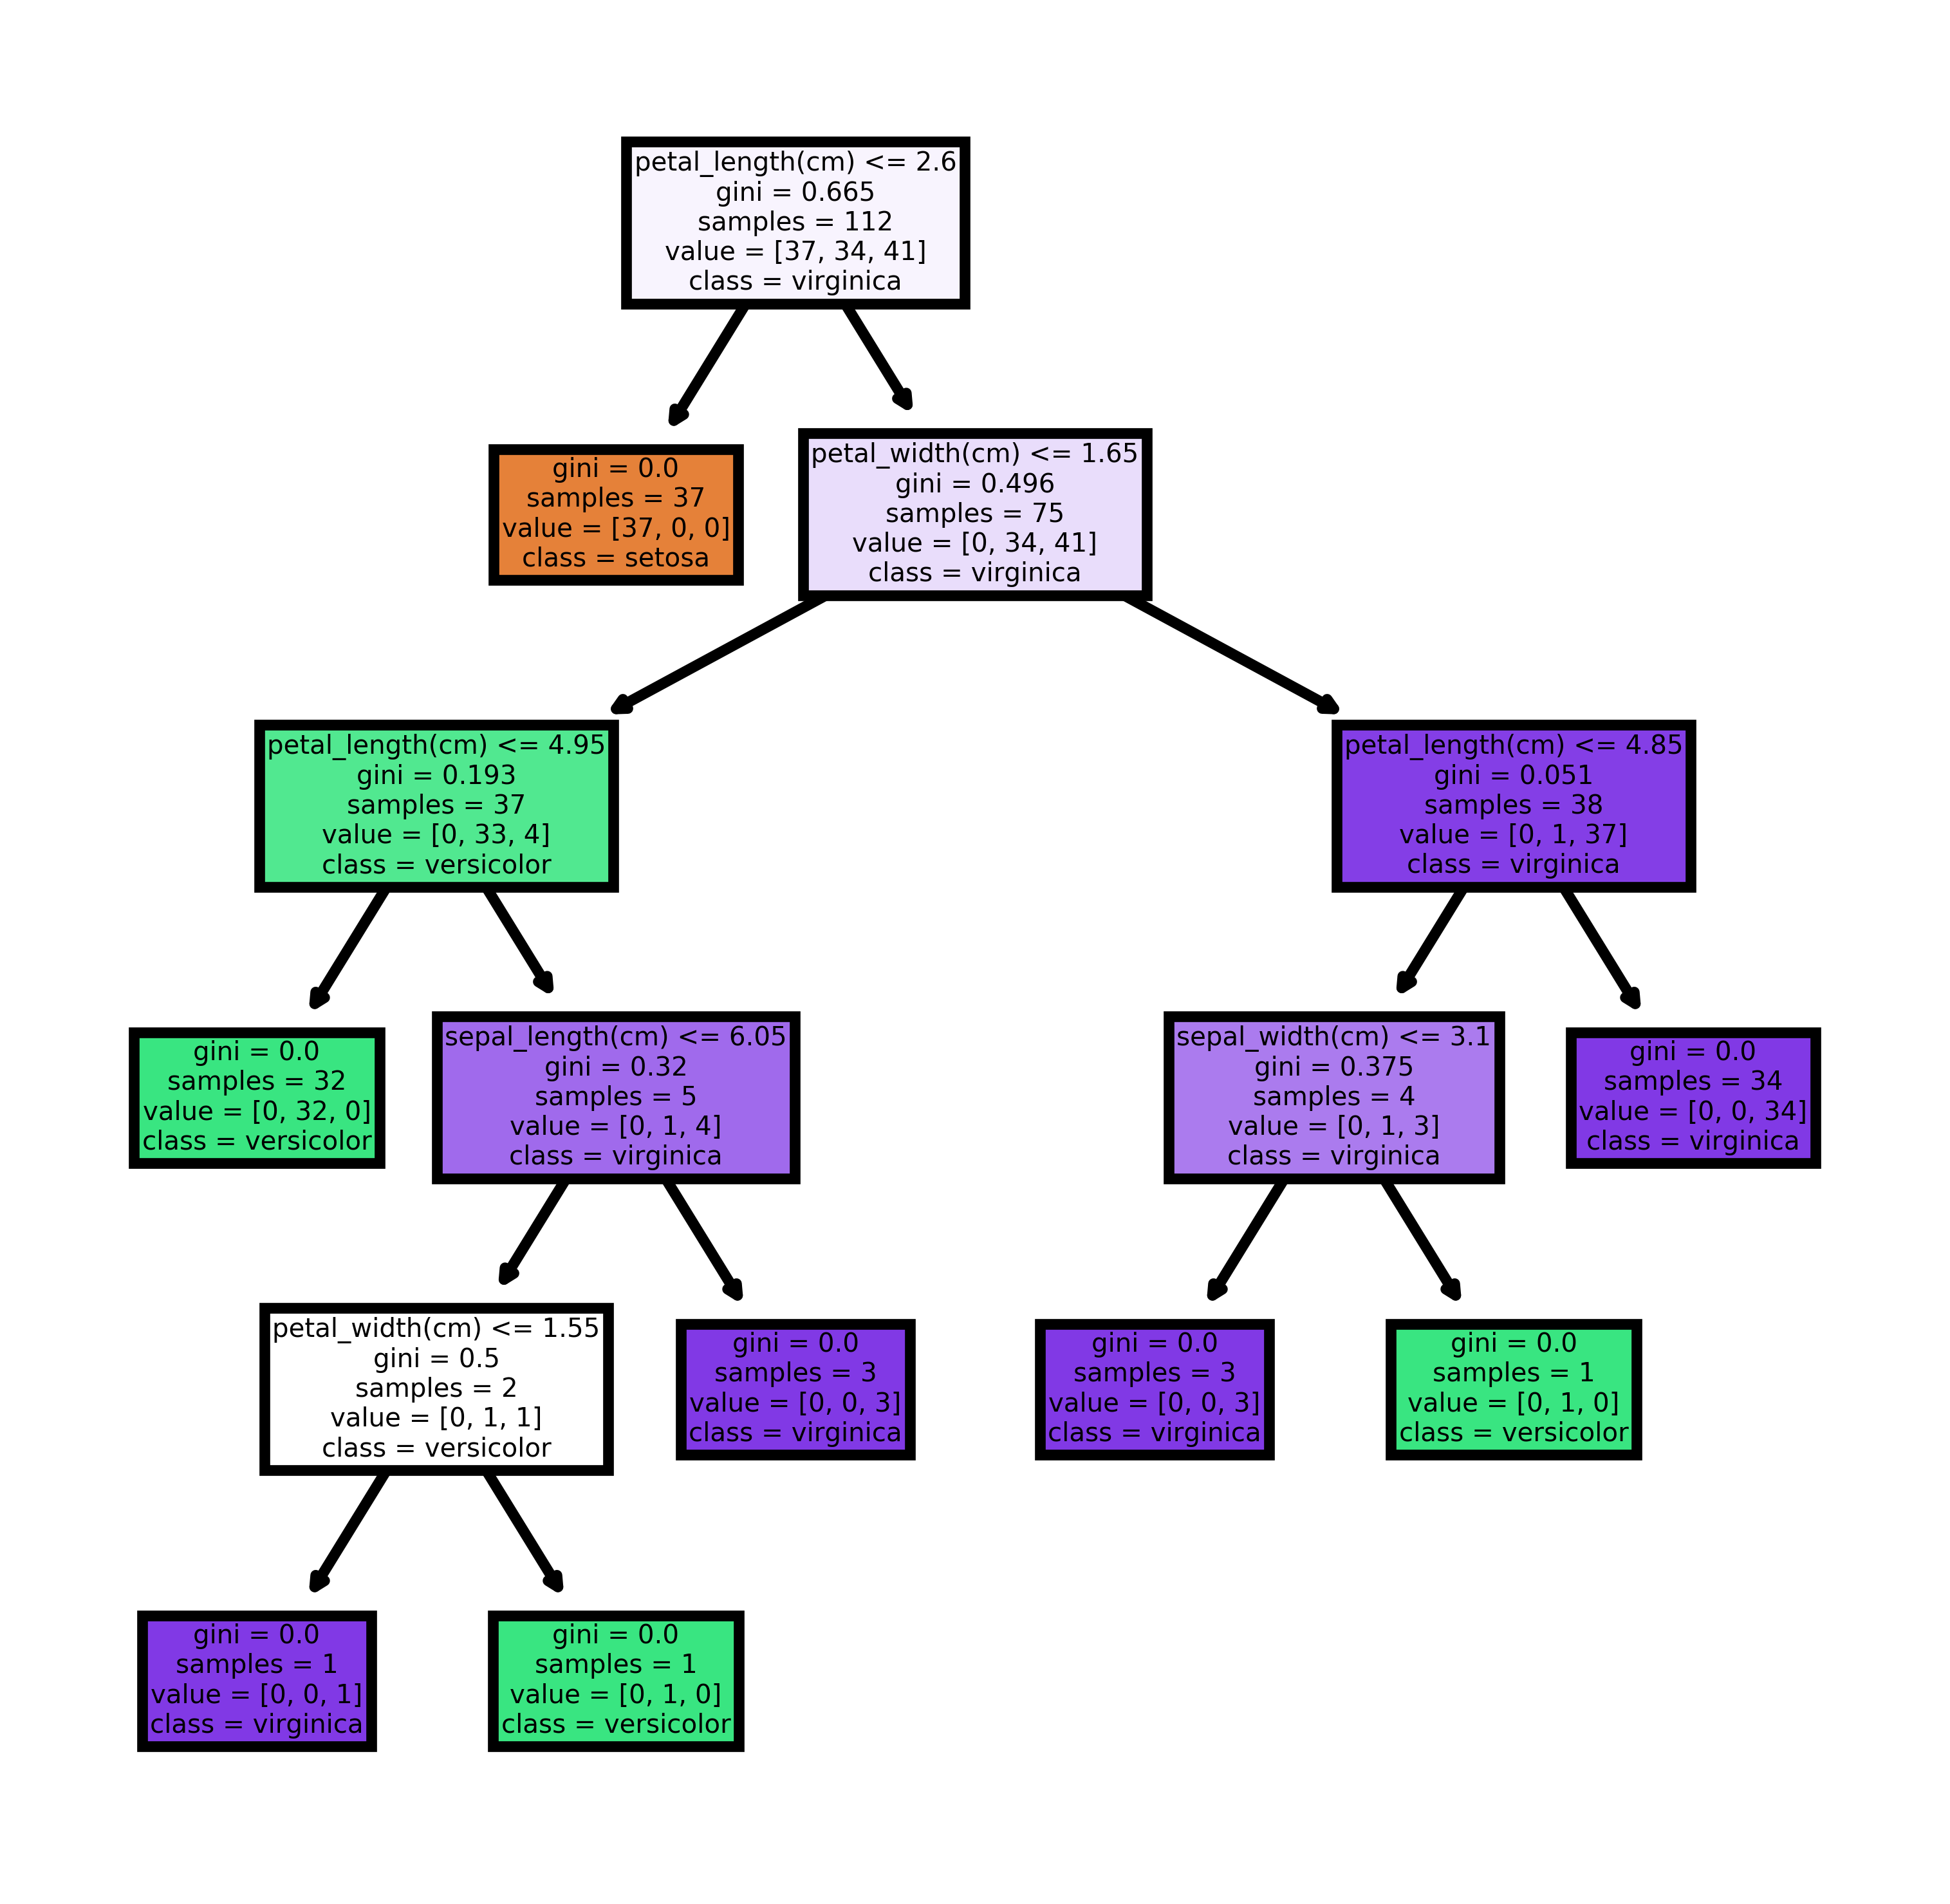

In [44]:
from sklearn import tree
feature_names = ['sepal_length(cm)','sepal_width(cm)','petal_length(cm)','petal_width(cm)']
class_names = ['setosa','versicolor','virginica']
fig, axes =plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=1200)
tree.plot_tree(classifier,feature_names=feature_names,class_names=class_names,filled=True)
fig.savefig('dtree_image.png')